# Course 2, Task 3: Build and Evaluate Models

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# estimators
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import accuracy_score, classification_report
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

In [2]:
# creates a dataframe based on the cleaned version of the data from an excel file
# One-Hot Encoding is done to create relevant categorical variables, 
# "loan_result_default", "sex_male", and variables related to education status

df = pd.read_excel("data.xlsx", "new_data")
                   
df = pd.get_dummies(df, columns=["loan_result"])
df = df.drop(columns="loan_result_not default")

df = pd.get_dummies(df, columns=["sex"])
df = df.drop(columns="sex_female")

df = pd.get_dummies(df, columns=["education"])

# drops unnecessary "id" column -- necessary to create the appropciate feature space (X variable) as the test set

df.drop(columns="id", inplace=True)
df

C:\Users\cralx2k\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,limit_balance,marriage_status,age,sept_pay_status,aug_pay_status,july_pay_status,june_pay_status,may_pay_status,april_pay_status,sept_bill_amount,...,july_pay_amount,june_pay_amount,may_pay_amount,april_pay_amount,loan_result_default,sex_male,education_graduate school,education_high school,education_other,education_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,39,0,0,0,0,0,0,188948,...,5003,3047,5000,1000,0,1,0,1,0,0
29996,150000,2,43,-1,-1,-1,-1,0,0,1683,...,8998,129,0,0,0,1,0,1,0,0
29997,30000,2,37,4,3,2,-1,0,0,3565,...,22000,4200,2000,3100,1,1,0,0,0,1
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,1178,1926,52964,1804,1,1,0,1,0,0


## Correlation and Covariance + Correlation Heatmap (includes dummy variables)

In [3]:
# corr = df.corr()

# plt.figure(figsize=(12,10))
# sns.heatmap(corr, cmap="mako")
# plt.show()

In [4]:
# corr

In [5]:
# df.cov()

## Predicting Loan Default (Classification)

In [6]:
# features meant to predict "loan_result_default"

# does not inclide the loan_result_default variable in the feature space

features = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26]]

In [7]:
# features

X = features
print("Summary of feature sample.")
X.head()

Summary of feature sample.


,limit_balance,marriage_status,age,sept_pay_status,aug_pay_status,july_pay_status,june_pay_status,may_pay_status,april_pay_status,sept_bill_amount,...,aug_pay_amount,july_pay_amount,june_pay_amount,may_pay_amount,april_pay_amount,sex_male,education_graduate school,education_high school,education_other,education_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,1,0,0,0,1


In [8]:
y = df["loan_result_default"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [10]:
loan_result_default_GBC = GradientBoostingClassifier(max_features=10)

loan_result_default_GBC_model = loan_result_default_GBC.fit(X_train, y_train)

preds_loan_result_default_GBC_model = loan_result_default_GBC_model.predict(X_test)

print(classification_report(y_test, preds_loan_result_default_GBC_model, zero_division=True))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7052
           1       0.65      0.37      0.47      1948

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# Predicting Amount of Credit to Give (Regression)

In [11]:
# features does not include the  "limit balance" variable

features = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]

X = features

In [12]:
y = df["limit_balance"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [14]:
# creates three regression algorithms, in the form of tuples, into a list "algosClass"

algosClass = []

algosClass.append(("Random Forest Regressor", RandomForestRegressor(max_depth=10)))
algosClass.append(("Linear Regression", LinearRegression(n_jobs=10)))
algosClass.append(("Support Vector Regression", SVR()))

In [15]:
# regression

results = []
names = []

# generates cross validation scores for the three algorithms

for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring="r2")
    names.append(name)
    results.append(result)
    
# prints cross validation scores for the three algorithms

for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.46699561535968415
Linear Regression 0.3581989426610923
Support Vector Regression -0.05037380127315694


In [16]:
predictions = []
rmse_scores = []
predRsquared_scores = []

algos_list = [algosClass[0][1], algosClass[1][1], algosClass[2][1]]

# creates three models based on the three previously created algorithms

# creates prediction values for each of the models

for algo in range(len(algos_list)):
    model = algos_list[algo].fit(X_train, y_train)
    prediction = model.predict(X_test)
    predictions.append(prediction)

In [17]:
# generates RMSE and R Squared scores for the three models based on their respective predictive values

for i in range(len(predictions)):
    # print(predictions[i])
    rmse = sqrt(mean_squared_error(y_test, predictions[i]))
    predRsquared = r2_score(y_test, predictions[i])
    rmse_scores.append(rmse)
    predRsquared_scores.append(predRsquared)
    print(f"{algos_list[i]}","RMSE: %.3f" % rmse_scores[i], "\n")
    print(f"{algos_list[i]}","R Squared: %.3f" % predRsquared_scores[i], "\n")

RandomForestRegressor(max_depth=10) RMSE: 93601.435 

RandomForestRegressor(max_depth=10) R Squared: 0.471 

LinearRegression(n_jobs=10) RMSE: 102975.437 

LinearRegression(n_jobs=10) R Squared: 0.360 

SVR() RMSE: 131044.967 

SVR() R Squared: -0.037 



In [18]:
# creates the prediction values for each of the algorithms, using the X_test set 

RFR_pred = algosClass[0][1].predict(X_test)
LR_pred = algosClass[1][1].predict(X_test)
SVR_pred = algosClass[2][1].predict(X_test)

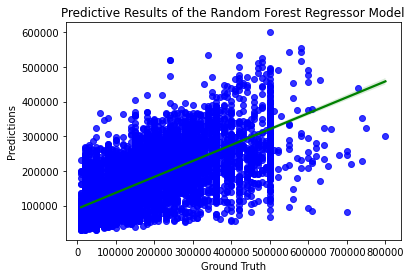

In [26]:
sns.regplot(x=y_test, y=RFR_pred, color="blue", line_kws={"color":"green"})
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title("Predictive Results of the Random Forest Regressor Model")
plt.show()

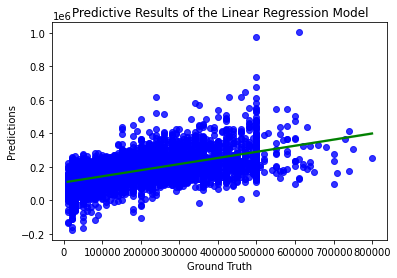

In [25]:
sns.regplot(x=y_test, y=LR_pred, color="blue", line_kws={"color":"green"})
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title("Predictive Results of the Linear Regression Model")
plt.show()

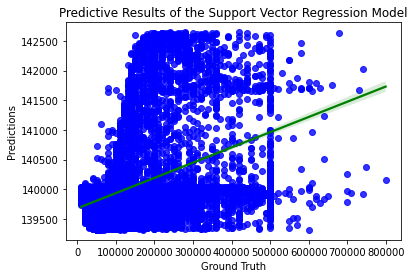

In [24]:
sns.regplot(x=y_test, y=SVR_pred, color="blue", line_kws={"color":"green"})
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Predictive Results of the Support Vector Regression Model")
plt.show()